# 4.3 選擇演算法

In [1]:
# 取得中文字型
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2021-12-23 09:29:54--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2021-12-23 09:29:54--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2021-12-23 09:29:55 

In [2]:
# 共通事前處理

# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 123

### 4.3.2 範例原始碼所使用之資料

In [3]:
# 範例資料的生成

# 匯入函式庫
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

# 線性可分離
X1, y1 = make_classification(n_features=2, n_redundant=0, 
    n_informative=2, random_state=random_seed, 
    n_clusters_per_class=1, n_samples=200, n_classes=2)

# 新月型（線性不可分離）
X2, y2 = make_moons(noise = 0.05, random_state=random_seed, 
    n_samples=200)

# 圓形（線性不可分離）
X3, y3 = make_circles(noise = 0.02, random_state=random_seed, 
    n_samples=200)

# 將 3 種資料指派給 DataList
DataList = [(X1, y1), (X2, y2), (X3, y3)]

# N: 資料的種類數
N = len(DataList)

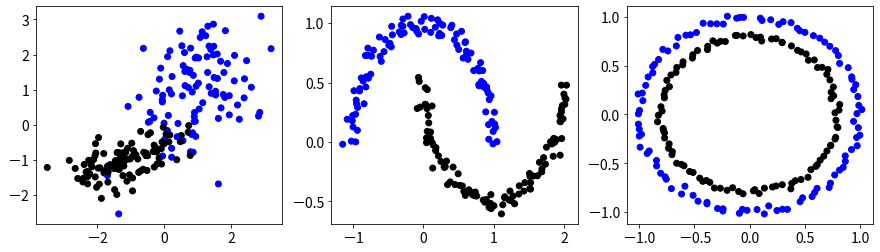

In [4]:
# 繪製散佈圖
plt.figure(figsize=(15,4))

# 定義顏色對應表
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#0000FF', '#000000'])

for i, data in enumerate(DataList):
    X, y = data
    ax = plt.subplot(1, N, i+1)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

# 繪製最佳決策邊界的函式
def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    # 定義顏色對應表
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'驗證:{score_test:.2f}  訓練: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18) 
    

In [6]:
# 繪製散佈圖與最佳決策邊界的函式

def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

### 4.3.3 邏輯斯迴歸

#### 繪製 sigmoid 函數的圖形

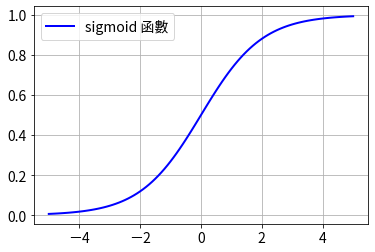

In [7]:
# sigmoid 函數的定義
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# 準備 x 的資料
x = np.linspace(-5, 5, 101)

# 準備 y 的資料
y = sigmoid(x)

# 繪製圖形
plt.plot(x, y, label='sigmoid 函數', c='b', lw=2)

# 顯示圖例
plt.legend()

# 顯示網格
plt.grid()

# 繪製圖形
plt.show()

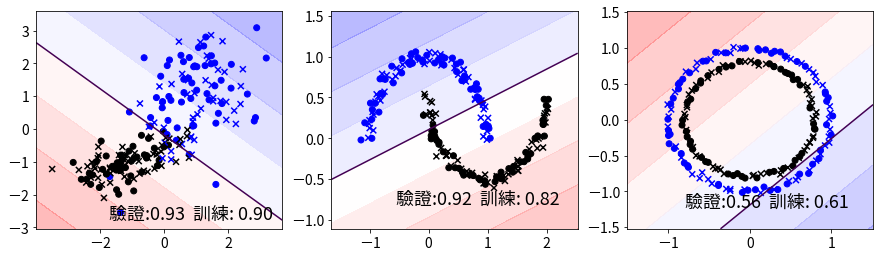

In [28]:
# 繪製邏輯斯迴歸的散佈圖與分類結果

# 選擇演算法
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

# 顯示演算法的參數
algorithm.get_params()

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

### 4.3.4 支援向量機（Kernel method）

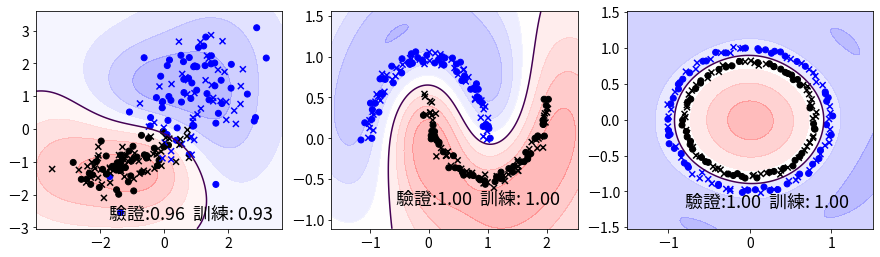

In [34]:
# 繪製 SVM（Kernel method）的散佈圖與分類結果

# 選擇演算法
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf', random_state=random_seed)

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

### 4.3.5 神經網路

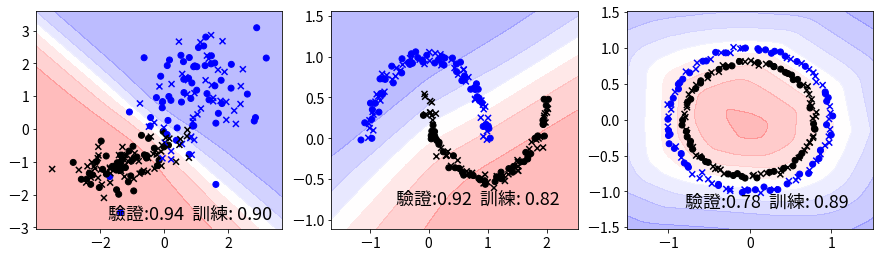

In [35]:
# 繪製神經網路的散佈圖與分類結果

# 選擇演算法
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(random_state=random_seed)

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

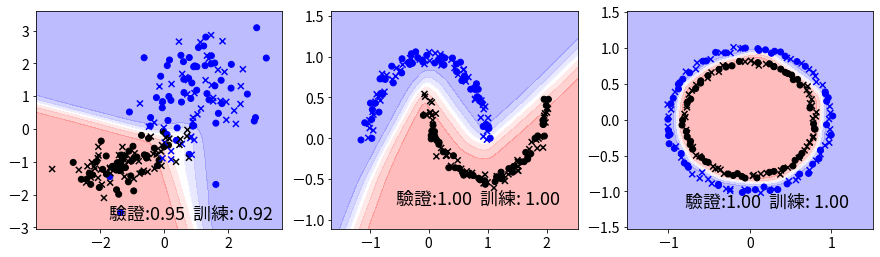

In [36]:
# 繪製神經網路的散佈圖與分類結果

# 選擇演算法
# 隱藏層節點數=(100,100)
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(hidden_layer_sizes=(100,100), random_state=random_seed)

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

### 4.3.6 決策樹

In [12]:
# 匯入追加的函式庫
import seaborn as sns

# 載入範例資料
df_iris = sns.load_dataset("iris")

# 將鳶尾花的品種縮減至 2 種
df2 = df_iris[50:150]

# 將資料表切成 X, y 兩個
X = df2.drop('species', axis=1)
y = df2['species']

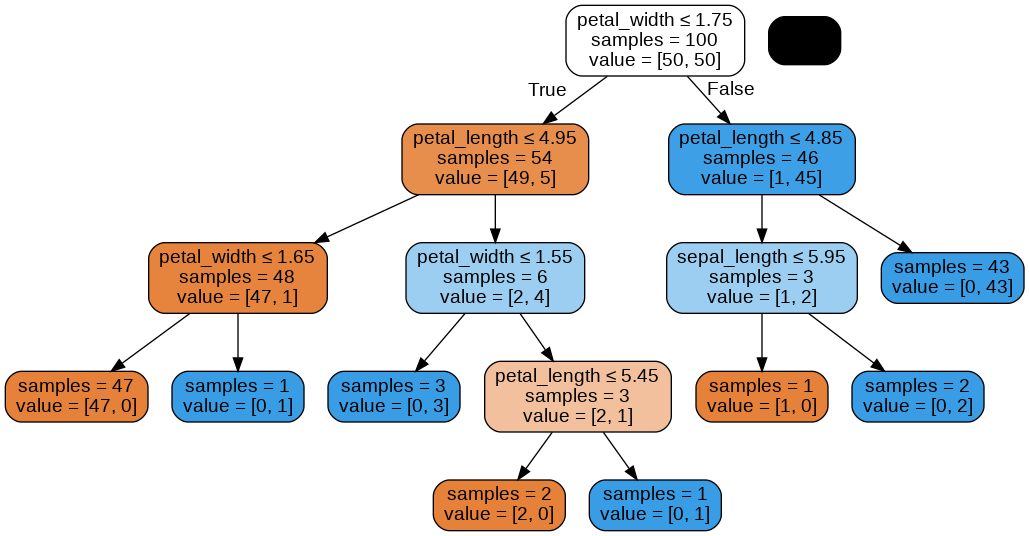

In [13]:
# 訓練
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(X, y)

# 繪製決策樹的樹狀結構
from sklearn import tree
with open('iris-dtree.dot', mode='w') as f:
    tree.export_graphviz( algorithm, out_file=f,
        feature_names=X.columns, filled=True, rounded=True,  
        special_characters=True, impurity=False, proportion=False
    ) 
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('iris-dtree.dot')
graph.write_png('iris-dtree.png')
Image(graph.create_png())

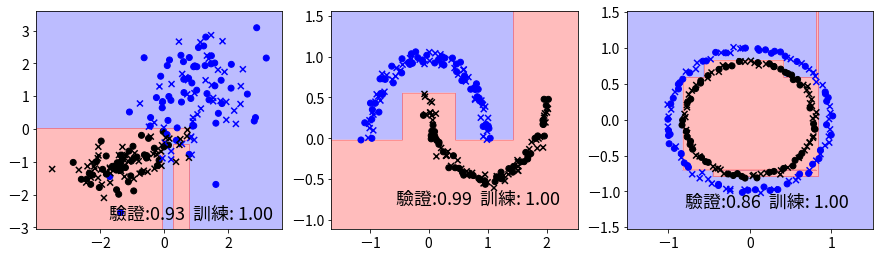

In [37]:
# 繪製決策樹的散佈圖與分類結果

# 選擇演算法
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

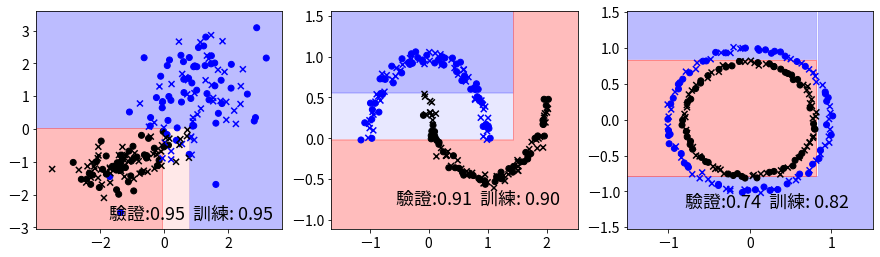

In [38]:
# 繪製決策樹的散佈圖與分類結果（當 max_depth=3 時）

# 選擇演算法
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(max_depth=3, 
    random_state=random_seed)

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

### 4.3.7 隨機森林

RandomForestClassifier(random_state=123)


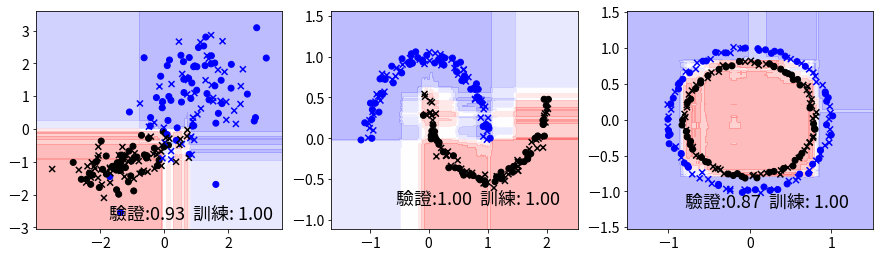

In [16]:
# 繪製隨機森林的散佈圖與分類結果

# 選擇演算法
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)

# 顯示演算法的參數
print(algorithm)

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

### 4.3.8 XGBoost

XGBClassifier(random_state=123)


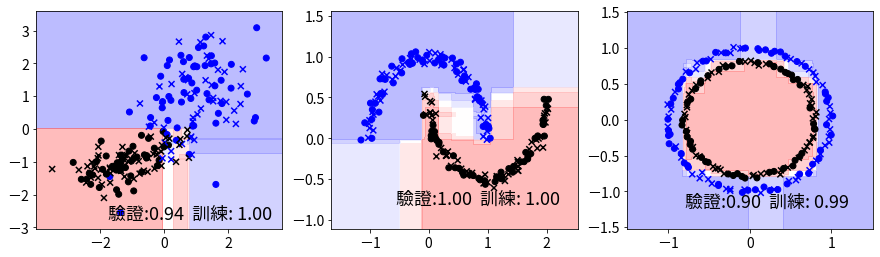

In [17]:
# 繪製 XGBoost 的散佈圖與分類結果

# 選擇演算法
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)

# 顯示演算法的參數 
print(algorithm)

# 呼叫繪圖函式
plot_boundaries(algorithm, DataList)

### 參考
確認版本用

In [18]:
import sklearn
print(sklearn.__version__)

1.0.1
